# Feature Scaling

## Used to scale down a feature so, it won't overpower other features

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('D:/Btech_CS/Python/Feature_Engineering/house-prices-advanced-regression-techniques/train.csv')

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [5]:
def summary_stats(series):
    return {
        "mean" : series.mean(),
        "std" : series.std(),
        "skewness" : series.skew(),
    }

def compare_distribution(original, transformed, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(original, bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{title} - Before")
    sns.histplot(transformed, bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f"{title} - After")
    plt.show()

# 1. Standard Scaling
- Formula: z = (x - μ) / σ

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(-2.677107310003708e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(2.1635691423248846)}


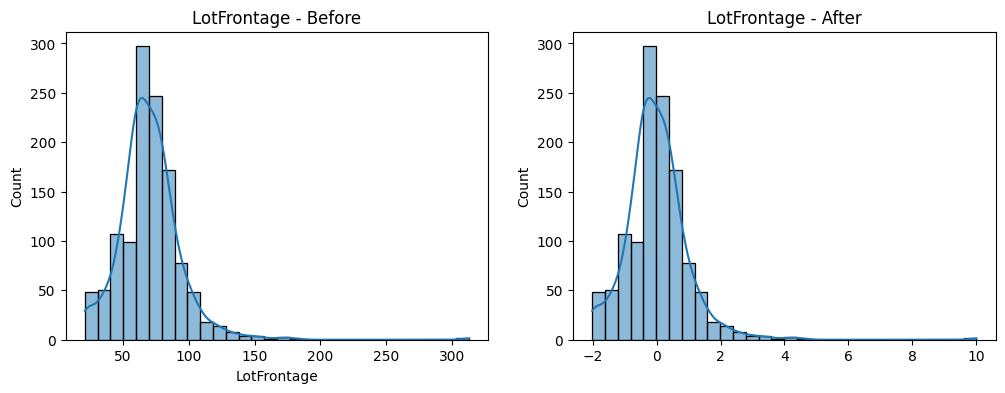

In [9]:
col = "LotFrontage"
scaler = StandardScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col)


# 2. MinMax Scaling
- Formula: x' = (x - min) / (max - min)

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(0.1679793094795433), 'std': np.float64(0.0831669581317918), 'skewness': np.float64(2.1635691423248846)}


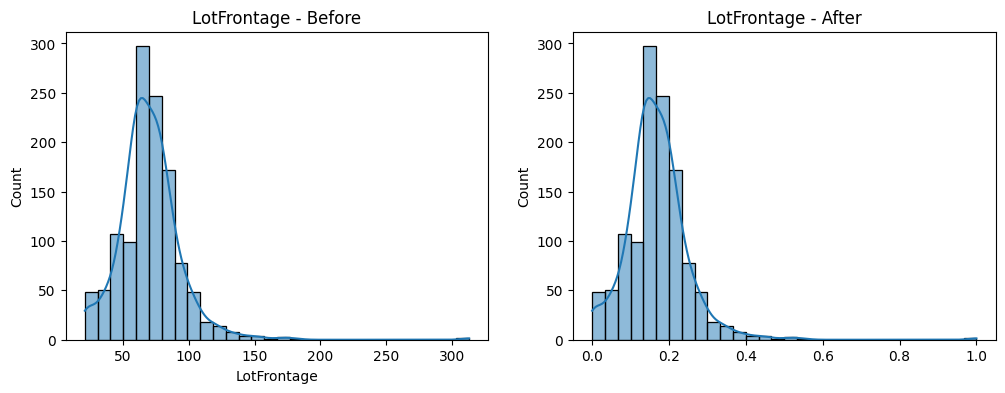

In [10]:
col = "LotFrontage"
scaler = MinMaxScaler()
lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), lot_scaled.flatten(), col)

# 3. Robust Scaling
- Formula: x' = (x - median) / IQR

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(0.04999801752507831), 'std': np.float64(1.156416751165867), 'skewness': np.float64(2.163569142324884)}


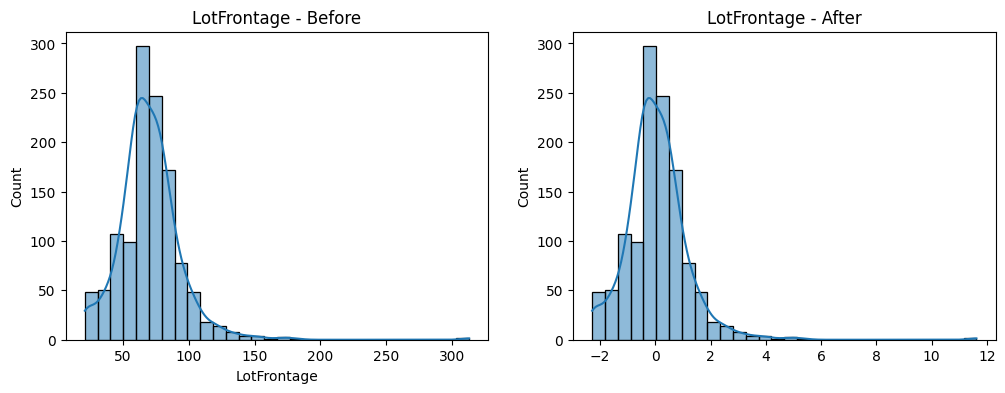

In [11]:
col = "LotFrontage"
scaler = RobustScaler()
Lot_scaled = scaler.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(pd.Series(Lot_scaled.flatten()))}")
compare_distribution(df[col].dropna(), Lot_scaled.flatten(), col)

# 4. Log Transformation
- Formula: x' = log(x + 1)

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.1635691423248837)}
After: {'mean': np.float64(4.207108941714102), 'std': np.float64(0.3462283309333295), 'skewness': np.float64(-0.7287278423055492)}


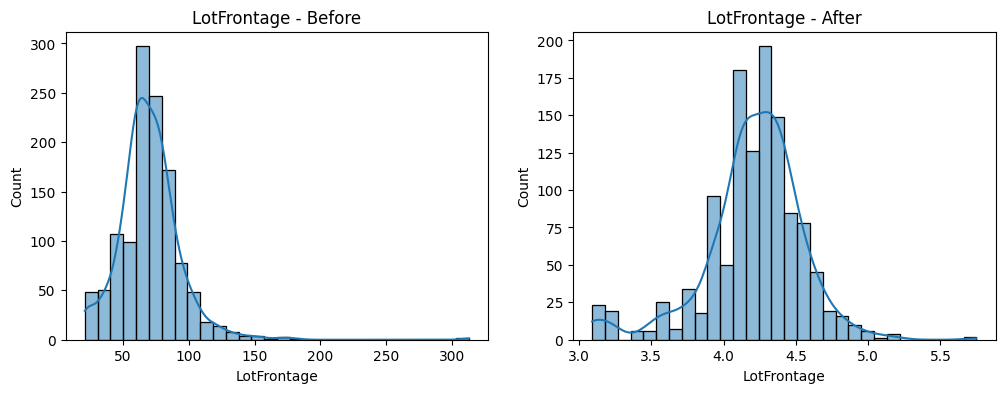

In [12]:

col = "LotFrontage"
log_trans = np.log1p(df[col].dropna())
print(f"Before: {summary_stats(df[col].dropna())}")
print(f"After: {summary_stats(log_trans)}")
compare_distribution(df[col].dropna(), log_trans, col)

# 5. Yeo-Johnson
- Formula: x' = log(x + 1)

Before: {'mean': np.float64(70.04995836802665), 'std': np.float64(24.284751774483208), 'skewness': np.float64(2.163569142324884)}
After: {'mean': np.float64(-7.3805334126621565e-16), 'std': np.float64(1.0004165798972613), 'skewness': np.float64(0.11527708161436032)}


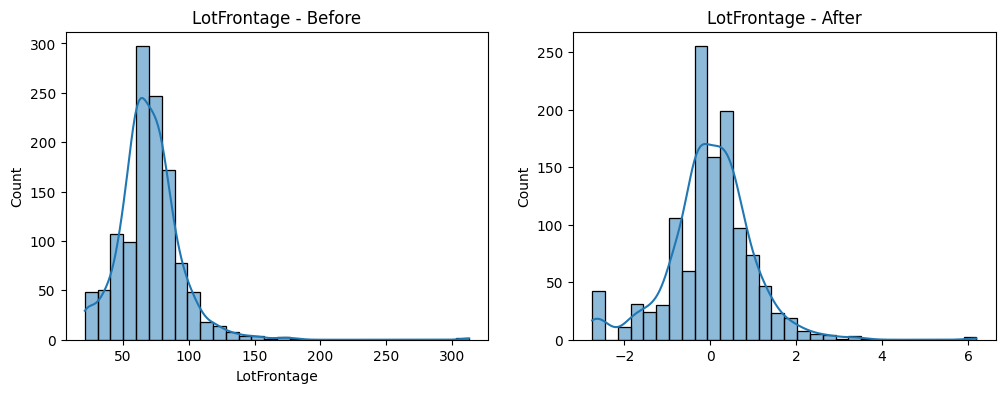

In [13]:
col = "LotFrontage"
pt = PowerTransformer(method="yeo-johnson")
lot_trans = pt.fit_transform(df[[col]])
print(f"Before: {summary_stats(df[col])}")
print(f"After: {summary_stats(pd.Series(lot_trans.flatten()))}")
compare_distribution(df[col].dropna(), lot_trans.flatten(), col)

# square-root transformation
- root of x

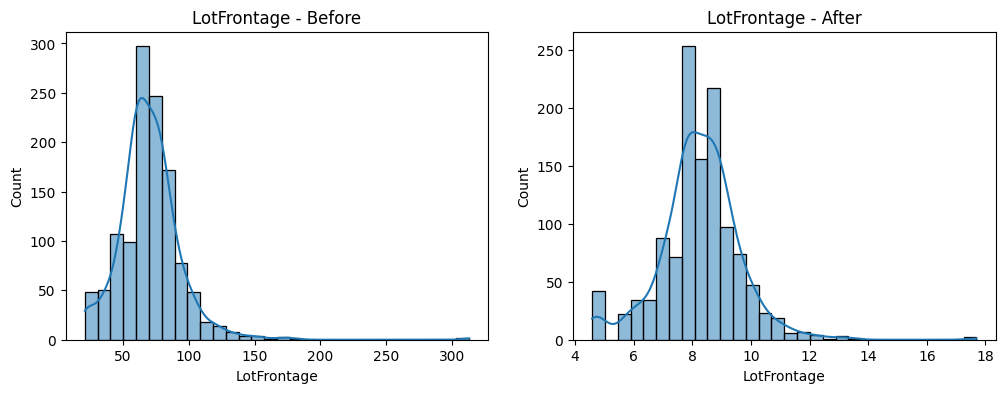

In [14]:
df_applied = df.copy()
col = "LotFrontage"

df_applied[col] = df_applied[col].apply(lambda x : np.sqrt(x))
compare_distribution(df[col], df_applied[col], col)

# cube-root transformation
- root of x

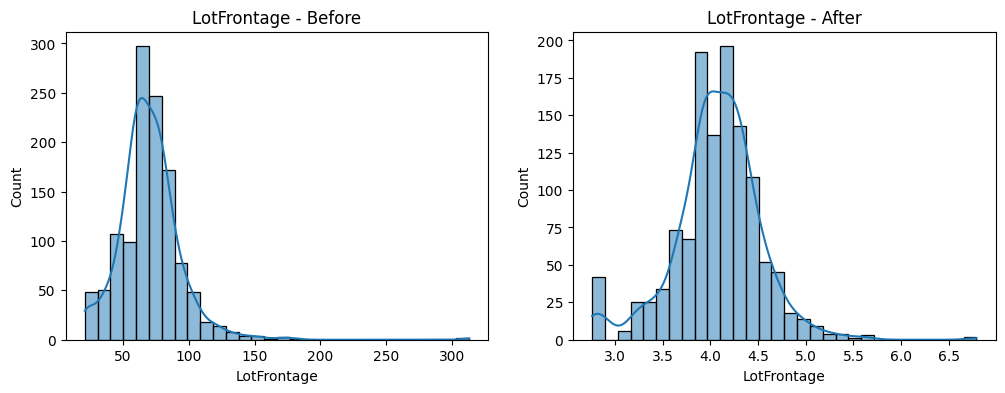

In [15]:
df_transformed = df.copy()
col = "LotFrontage"

df_transformed[col] = np.cbrt(df_transformed[col])
compare_distribution(df[col], df_transformed[col], col)
